**Import necessary libraries**

In [48]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

Load the MNIST dataset


In [49]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Normalize the pixel values of the images to be between 0 and 1


In [50]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

Reshape the data to have a single channel (grayscale)


In [51]:
(X_train) = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
(X_test) = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Display the shapes of training and testing data


In [52]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


Creating a Nerual Network model using keras

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

Compile the model

In [58]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Slice y_train and y_trst to match the shape of X_train and X_test

In [59]:
y_train = y_train[:X_train.shape[0]]
y_test = y_test[:X_test.shape[0]]

# Fit the model again
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 2s - loss: 0.0244 - accuracy: 0.9927 - val_loss: 0.1028 - val_accuracy: 0.9723 - 2s/epoch - 7ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0949 - val_accuracy: 0.9737 - 1s/epoch - 5ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0922 - val_accuracy: 0.9746 - 1s/epoch - 5ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0114 - accuracy: 0.9970 - val_loss: 0.0946 - val_accuracy: 0.9763 - 1s/epoch - 5ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.1047 - val_accuracy: 0.9728 - 1s/epoch - 5ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0990 - val_accuracy: 0.9749 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.1039 - val_accuracy: 0.9738 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.1000 - val_accuracy: 0.9764 - 1s/epoch - 5ms/step
Epoch 9/10
300/300 - 1s 

Data Augmentation


In [60]:
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train)

Early stopping callback


In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

TensorBoard callback


In [62]:
tensorboard = TensorBoard(log_dir='logs')

Fit the model with data augmentation and callbacks


In [65]:
model.fit(datagen.flow(X_train, y_train, batch_size=200), epochs=5, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stop, tensorboard])

Epoch 1/5
300/300 - 20s - loss: 0.3734 - accuracy: 0.8940 - val_loss: 0.1019 - val_accuracy: 0.9672 - 20s/epoch - 65ms/step
Epoch 2/5
300/300 - 19s - loss: 0.2127 - accuracy: 0.9337 - val_loss: 0.0843 - val_accuracy: 0.9731 - 19s/epoch - 62ms/step
Epoch 3/5
300/300 - 28s - loss: 0.1816 - accuracy: 0.9431 - val_loss: 0.0776 - val_accuracy: 0.9757 - 28s/epoch - 93ms/step
Epoch 4/5
300/300 - 18s - loss: 0.1629 - accuracy: 0.9498 - val_loss: 0.0757 - val_accuracy: 0.9757 - 18s/epoch - 59ms/step
Epoch 5/5
300/300 - 19s - loss: 0.1518 - accuracy: 0.9533 - val_loss: 0.0727 - val_accuracy: 0.9766 - 19s/epoch - 63ms/step


Evaluate the model on the test data and print the accuracy

In [66]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (accuracy[1] * 100))

Test Accuracy: 97.66%


save the model

In [67]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.9765999913215637 
 Error: 2.340000867843628


In [69]:
predictions = model.predict(X_test[:10])

1/1 [==============================] - 0s 60ms/step


Display the predictions and corresponding images


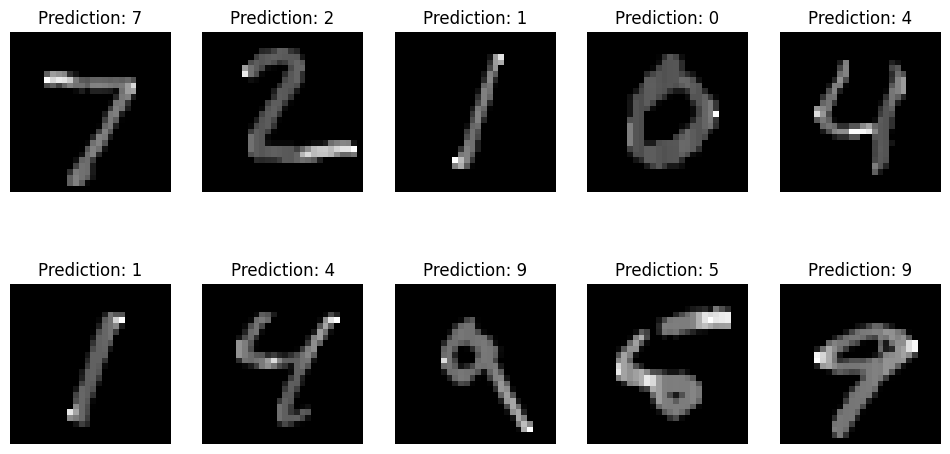

In [70]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Prediction: {}".format(np.argmax(predictions[i])), fontsize=12)
    plt.axis('off')

plt.show()

Display bar charts showing the confidence of predictions


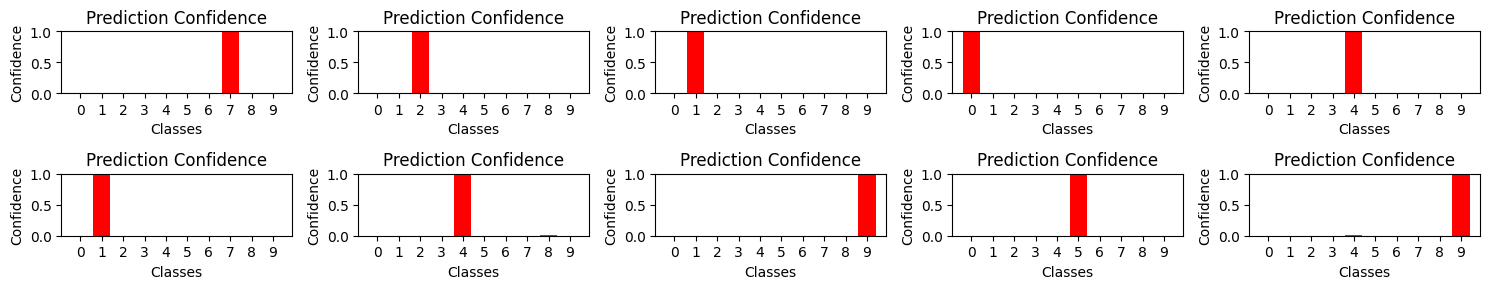

In [71]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.bar(range(10), predictions[i], color='blue', alpha=0.7)
    plt.xlabel('Classes')
    plt.ylabel('Confidence')
    plt.title('Prediction Confidence')
    plt.xticks(range(27))
    plt.ylim(0, 1)

    plt.bar(np.argmax(predictions[i]), predictions[i, np.argmax(predictions[i])], color='red')

plt.tight_layout()

plt.show()

In [83]:
model = tf.keras.models.load_model('mnist_model.h5')

1/1 [==============================] - 0s 20ms/step
This digit is probably a 1


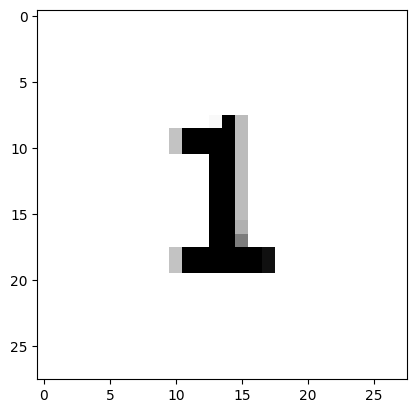

1/1 [==============================] - 0s 18ms/step
This digit is probably a 2


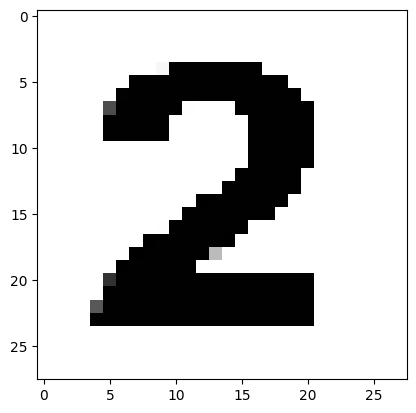

1/1 [==============================] - 0s 18ms/step
This digit is probably a 3


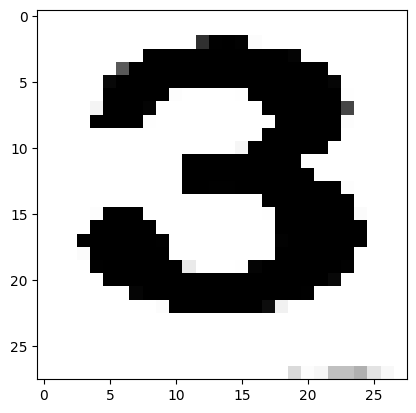

1/1 [==============================] - 0s 20ms/step
This digit is probably a 4


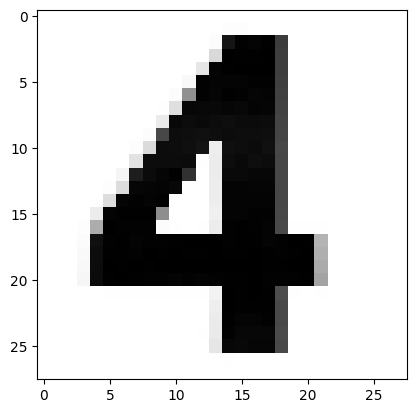

1/1 [==============================] - 0s 18ms/step
This digit is probably a 5


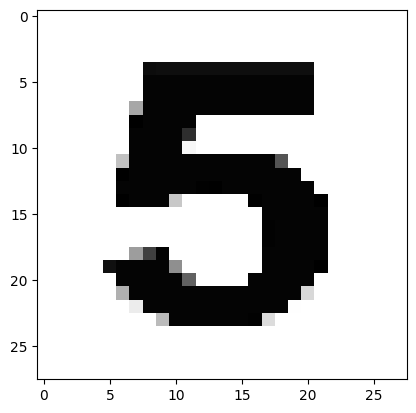

1/1 [==============================] - 0s 19ms/step
This digit is probably a 6


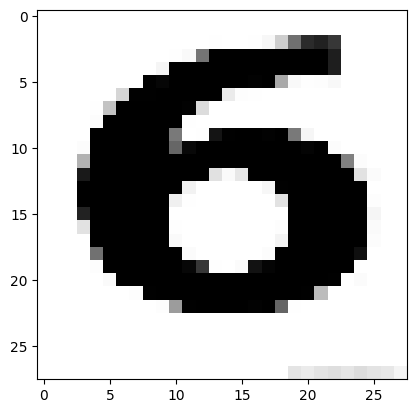

1/1 [==============================] - 0s 19ms/step
This digit is probably a 7


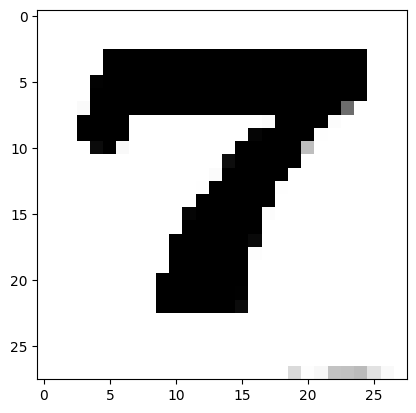

1/1 [==============================] - 0s 22ms/step
This digit is probably a 8


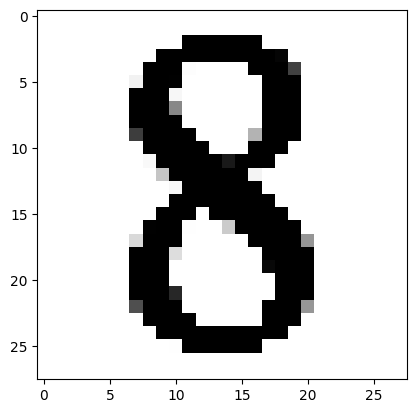

1/1 [==============================] - 0s 18ms/step
This digit is probably a 9


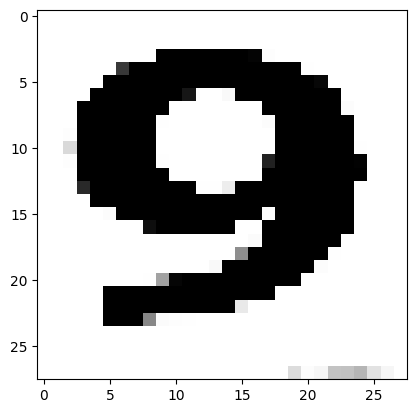

In [85]:
image_number = 1
while os.path.isfile(f"/content/Number {image_number}.jpg"):
    try:
        # Load the image
        img = cv2.imread(f"/content/Number {image_number}.jpg", cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = np.invert(img)
        img = img.reshape(1, 28, 28, 1).astype('float32') / 255.0  # Normalize

        # Make a prediction
        prediction = model.predict(img)

        # Display the result
        predicted_digit = np.argmax(prediction)
        print(f"This digit is probably a {predicted_digit}")

        plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print(f"Error processing digit {image_number}: {e}")
        print("Error!")

    finally:
        image_number += 1